<a href="https://colab.research.google.com/github/saikiran-18/Transaction-Fraud-Detection/blob/main/Transaction_Fraud_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title:** Transaction Fraud Detection

---


##**Dataset:** Synthetic Fraud Dataset (CSV)
##**Prepared By:** Saikiran.k
##**Core Subject:** Machine Learning

---



This project falls under the category of **Unsupervised Machine Learning**.

The reason it is *unsupervised* is that we are not predicting a predefined label (fraud or not). Instead, the algorithm (K-Means along with PCA/t-SNE) is applied to find **hidden patterns and natural groupings** within transaction data. The model’s objective is to **separate normal vs. abnormal behaviors** and highlight clusters that are likely to contain fraudulent transactions.

Rather than relying on past fraud labels, this method allows the system to detect **previously unseen fraud patterns** by analyzing transaction similarity, clustering, and anomaly scoring.

---
Github link:https://github.com/saikiran-18/Transaction-Fraud-Detection




## 📊 Project Overview Table

| **Aspect**                   | **Details**                                                      |
| ---------------------------- | ---------------------------------------------------------------- |
| **Project Title**            | Transaction Fraud Detection                                      |
| **Domain**                   | Finance / E-commerce                                             |
| **Data Type**                | Transaction logs (amount, time, type, customer info, etc.)       |
| **Preprocessing**            | Data cleaning, scaling, handling missing values, outlier removal |
| **Dimensionality Reduction** | PCA (for variance retention), t-SNE (for 2D/3D visualization)    |
| **Clustering Method**        | K-Means Clustering (with Elbow method to choose *k*)             |
| **Evaluation Metrics**       | Silhouette Score, Davies-Bouldin Index, Outlier detection        |
| **Final Output**             | Fraud-prone clusters labeled, suspicious transactions flagged    |
| **Tools & Libraries**        | Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Plotly |

---




#🧾 Phase 1: Problem Understanding

---






Goal

Detect potentially fraudulent transactions by clustering and anomaly detection.

---



Why Unsupervised?

Fraudulent transactions are rare and labels may be missing. Unsupervised methods (K-Means, t-SNE, PCA, DBSCAN, Isolation Forest) help group normal vs. abnormal patterns.

---



Business Use Case:

**Banks: flag suspicious activities.

**E-commerce: detect fake transactions.

**Payment Gateways: prevent financial fraud losses.

#🧹 Phase 2: Data Collection & Preparation

---



We’ll first load and explore your dataset.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_fraud_dataset.csv")

# Preview
print(df.shape)
print(df.head())
print(df.info())


(50000, 21)
  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...       

👉 At this stage we’ll check:

Number of records & features

Missing values

Datatypes (categorical, numerical)

#📊 Phase 3: Exploratory Data Analysis (EDA)

---



Goals:

**Summary stats

**Feature distributions

**Correlations

**Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(df.describe())

# Missing values
print(df.isnull().sum())



       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.21836   
min              0.000000       500.480000          0.00000   
25%             28.677500     25355.995000          0.00000   
50%             69.660000     50384.430000          0.00000   
75%            138.852500     75115.135000          0.00000   
max           1174.140000     99998.310000          1.00000   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  50000.000000             50000.000000   
mean                       0.098400                 7.485240   
std                        0.297858                 4.039637   
min                        0.000000                 1.000000   
25%                        0.000000                 4.000000   
50%                        0.000000             

array([[<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Account_Balance'}>,
        <Axes: title={'center': 'IP_Address_Flag'}>],
       [<Axes: title={'center': 'Previous_Fraudulent_Activity'}>,
        <Axes: title={'center': 'Daily_Transaction_Count'}>,
        <Axes: title={'center': 'Avg_Transaction_Amount_7d'}>],
       [<Axes: title={'center': 'Failed_Transaction_Count_7d'}>,
        <Axes: title={'center': 'Card_Age'}>,
        <Axes: title={'center': 'Transaction_Distance'}>],
       [<Axes: title={'center': 'Risk_Score'}>,
        <Axes: title={'center': 'Is_Weekend'}>,
        <Axes: title={'center': 'Fraud_Label'}>]], dtype=object)

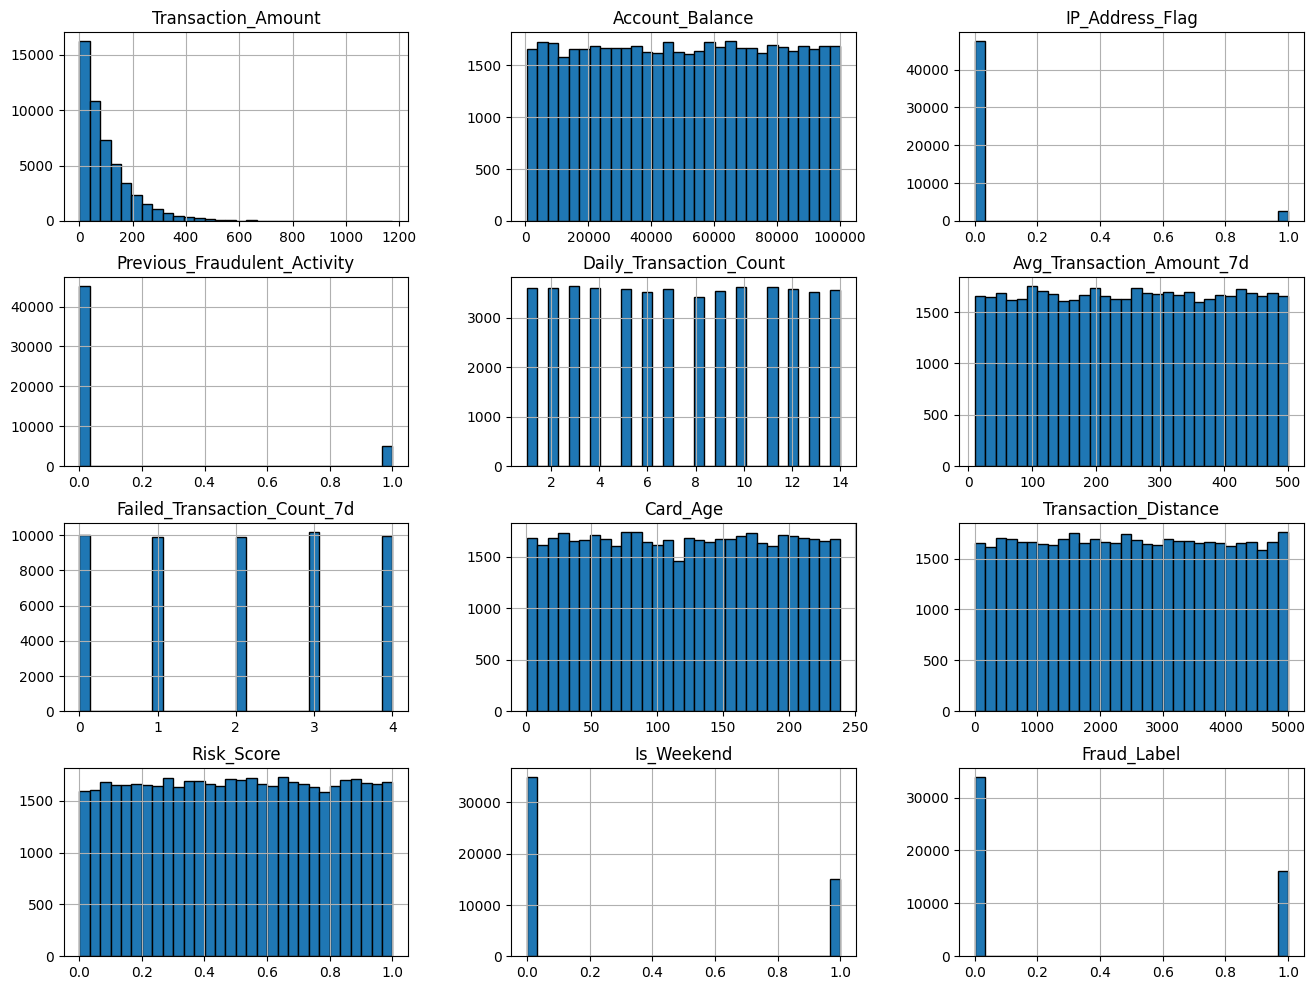

In [ ]:
# Distribution of numeric features
numeric_df = df.select_dtypes(include=["number"])
numeric_df.hist(figsize=(16,12), bins=30, edgecolor='black')

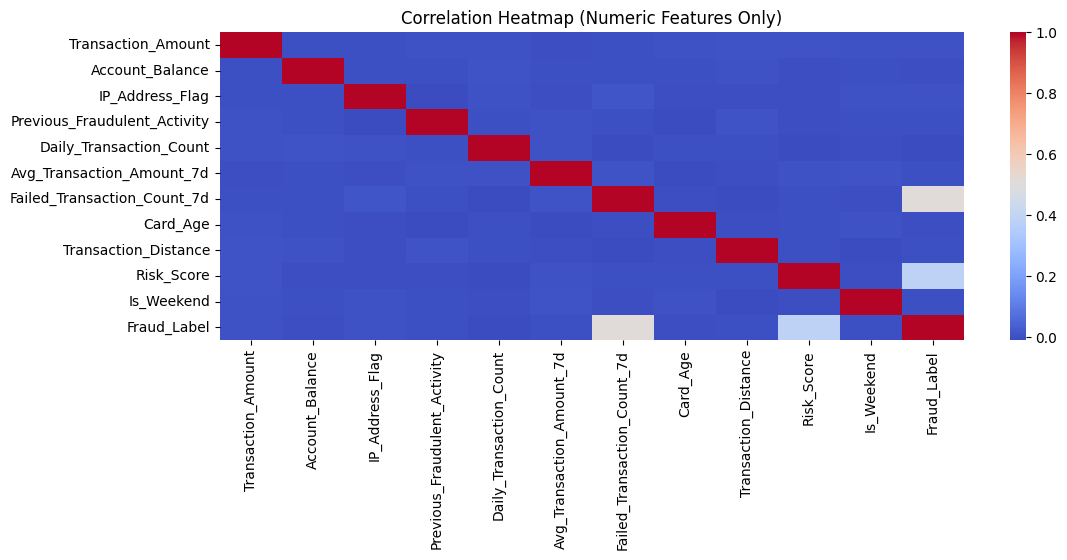

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,4))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

#🔎 Phase 4: Feature Engineering & Preprocessing

---



Steps:

**Scale numeric features → fraud detection is sensitive to magnitudes.

**Encode categorical values (if present).

**Outlier filtering (optional).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop identifiers if present (e.g., TransactionID, CustomerID)
X = df.drop(columns=["Transaction_ID", "User_ID", "Timestamp"], errors="ignore") # Dropping User_ID, Timestamp, and Fraud_Label

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

#🔬 Phase 5: Dimensionality Reduction

---



High-dimensional data is hard to cluster directly → use PCA or t-SNE.

In [ ]:
from sklearn.decomposition import PCA

# PCA to retain 90% variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Reduced features (PCA):", X_pca.shape[1])

Original features: 18
Reduced features (PCA): 11


#🔎 Phase 6: Clustering & Anomaly Detection (Optimized)

---



Instead of directly running silhouette scoring for every `k` (which is slow on large datasets), we optimize the process as follows:

1. **Elbow Method (Inertia-based):**

   * Run K-Means for `k = 2 to 10`.
   * Plot the inertia values and identify the “elbow point” where the curve bends.
   * This narrows down the possible number of clusters.

2. **Silhouette Score (Validation):**

   * Instead of testing all `k`, compute silhouette scores only for the **2–3 candidate values** of `k` suggested by the elbow method.
   * Use a **subset of the data (e.g., 10k samples)** if the dataset is very large, to save time.
   * Select the `k` with the **best silhouette score** (close to 1 = well-separated clusters).

3. **Train Final K-Means Model:**

   * Fit K-Means with the chosen `k` on the full PCA-reduced dataset.
   * Assign a cluster label to each transaction.

4. **Visualization with t-SNE / PCA:**

   * Project the high-dimensional data into 2D using t-SNE or PCA.
   * Plot the clusters to visually inspect separation.

5. **Fraud Detection Insight:**

   * Typically, **small and isolated clusters** represent fraud-prone transactions.
   * Compare cluster averages (e.g., transaction amount, risk score, flags) to identify suspicious clusters.

---

✅ This method ensures that:

* You **save time** by avoiding expensive silhouette computations for all k.
* You **balance speed with accuracy**, by combining inertia (fast) + silhouette (reliable).
* You still get a **clear cluster assignment** for fraud detection.

---




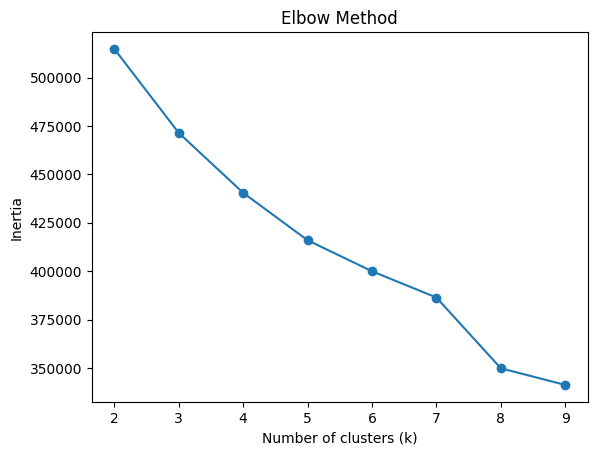

In [ ]:
#1.Elbow Method (Inertia-based)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)   # use reduced PCA data
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
#2.Confirm with Silhouette (on subset)
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Use subset for speed if dataset > 10k
X_sample = resample(X_pca, n_samples=10000, random_state=42) if X_pca.shape[0] > 10000 else X_pca

for k in [2, 3, 4]:   # <- pick based on elbow curve
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.140
k=3, silhouette=0.152
k=4, silhouette=0.129


In [ ]:
#3.Train Final K-Means
best_k = 3   # for example
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_pca)


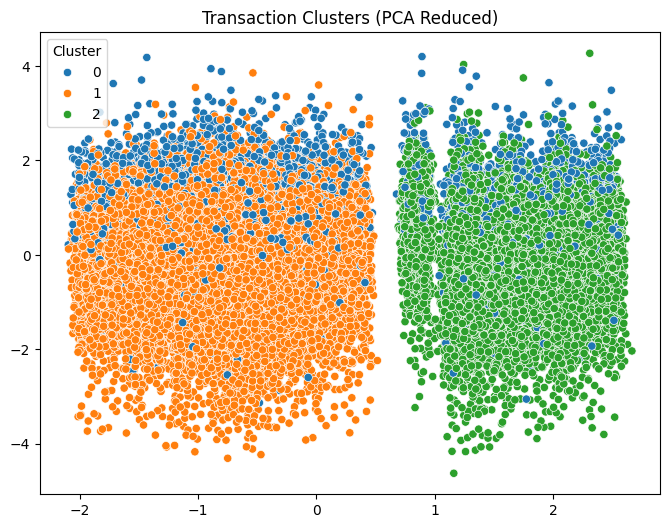

In [ ]:
#4.Visualize Results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="tab10", legend='full')
plt.title("Transaction Clusters (PCA Reduced)")
plt.show()

##Interpret Clusters

---



**Small in size

**Higher average transaction amount

**Higher fraud risk flags

#📈 Phase 7: Insights & Recommendations

---



Once clustering is complete, the goal is to interpret the clusters and generate business insights.

---



7.1 Cluster Profiling

---



Calculate mean, median, and distribution of important features per cluster (e.g., transaction amount, risk score, failed transactions).

Identify which clusters show unusual behavior.

**If you see a small cluster with very high transaction amounts or risk scores, that’s a strong fraud indicator.



---
7.2 Labeling Clusters

---



Example:


Cluster       Cluster_Label          
0             Normal or Medium-Risk      
2             Normal or Medium-Risk      
1             High-Risk / Fraud-Prone


In [ ]:
# Cluster profiling
print("Performing cluster profiling...")
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_profile)

# Cluster sizes
print("\nCluster sizes:")
print(df["Cluster"].value_counts())

Performing cluster profiling...
         Transaction_Amount  Account_Balance  IP_Address_Flag  \
Cluster                                                         
0                 68.707133     67736.912334         0.050916   
1                190.479756     43680.712300         0.049171   
2                 67.485267     37115.416738         0.050184   

         Previous_Fraudulent_Activity  Daily_Transaction_Count  \
Cluster                                                          
0                            0.097944                 7.510812   
1                            0.100844                 7.463962   
2                            0.097168                 7.473958   

         Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d    Card_Age  \
Cluster                                                                       
0                       254.084317                     2.000426  119.963038   
1                       255.810324                     1.988743  119.93370

In [ ]:
# Find fraud-prone cluster = highest avg Risk_Score
# Assuming 'Risk_Score' is the key metric for fraud in this context
fraud_cluster = cluster_profile["Risk_Score"].idxmax()

# Optionally, you could find a medium risk cluster as well
# For example, the cluster with the second highest average Risk_Score
# medium_cluster = cluster_profile["Risk_Score"].sort_values().index[-2]


# Dynamic labeling function
def label_cluster(c):
    if c == fraud_cluster:
        return "High-Risk / Fraud-Prone"
    # Add logic for medium risk if you identified one
    # elif c == medium_cluster:
    #     return "Medium-Risk"
    else:
        return "Normal or Medium-Risk" # Or 'Normal' if no medium risk cluster is defined

df["Cluster_Label"] = df["Cluster"].apply(label_cluster)

print("Cluster Labels Assigned:")
print(df[["Cluster", "Cluster_Label"]].value_counts())

Cluster Labels Assigned:
Cluster  Cluster_Label          
0        Normal or Medium-Risk      18776
2        Normal or Medium-Risk      18432
1        High-Risk / Fraud-Prone    12792
Name: count, dtype: int64


## 🏷️ Labeling Clusters

Based on the cluster profiling, we will label the clusters to identify those that are potentially fraud-prone. We can use metrics like the average risk score or other relevant features within each cluster to assign labels such as "Normal", "Medium-Risk", and "High-Risk / Fraud-Prone".

In [ ]:
cluster_profile["fraud_indicator"] = (
    0.6 * cluster_profile["Risk_Score"] +
    0.4 * cluster_profile["Transaction_Amount"]
)
fraud_cluster = cluster_profile["fraud_indicator"].idxmax()


In [276]:


# Save the retrained models
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(kmeans, "fraud_model.pkl")
joblib.dump(fraud_cluster, "fraud_cluster.pkl")
# Ensure fraud_cluster is also saved if it's determined in the training phase
# It seems fraud_cluster is determined later based on cluster profiling.
# Let's make sure the fraud_cluster is saved after it's determined.
# For now, I will just save the models. The fraud_cluster saving will happen in a later cell.

['fraud_cluster.pkl']

In [284]:
import joblib
import numpy as np
import pandas as pd

# Load the trained models and the fraud cluster ID
try:
    scaler = joblib.load("scaler.pkl")
    pca = joblib.load("pca.pkl")
    kmeans = joblib.load("fraud_model.pkl")
    fraud_cluster = joblib.load("fraud_cluster.pkl")
except FileNotFoundError:
    print("Error: Model files not found. Please ensure 'scaler.pkl', 'pca.pkl', 'fraud_model.pkl', and 'fraud_cluster.pkl' exist.")

# Define a function to predict the cluster for new data
def predict_fraud_cluster(transaction_amount, risk_score, transaction_distance, account_balance):

    # Create a numpy array from the input values in the correct order
    # Make sure the order of features matches the training data: 'Transaction_Amount', 'Risk_Score', 'Transaction_Distance', 'Account_Balance'
    new_transaction_features = np.array([[transaction_amount, risk_score, transaction_distance, account_balance]])

    # Scale the features using the loaded scaler
    scaled_features = scaler.transform(new_transaction_features)

    # Apply PCA using the loaded PCA model
    pca_features = pca.transform(scaled_features)

    # Predict the cluster using the loaded K-Means model
    predicted_cluster = kmeans.predict(pca_features)[0]

    # Check if the predicted cluster is the fraud-prone cluster
    is_fraudulent = (predicted_cluster == fraud_cluster)

    return int(predicted_cluster), is_fraudulent

# Example Usage: Predict for a new transaction
# Replace with actual new transaction data
new_transaction_amount = 150000.0
new_risk_score = 0.9
new_transaction_distance = 200.0
new_account_balance = 10000.0

predicted_cluster, is_fraudulent = predict_fraud_cluster(
    new_transaction_amount,
    new_risk_score,
    new_transaction_distance,
    new_account_balance
)

print(f"Predicted Cluster: {predicted_cluster}")
print(f"Is Fraudulent: {is_fraudulent}")

# Example with another transaction
new_transaction_amount_2 = 50.0
new_risk_score_2 = 0.1
new_transaction_distance_2 = 5000.0
new_account_balance_2 = 90000.0

predicted_cluster_2, is_fraudulent_2 = predict_fraud_cluster(
    new_transaction_amount_2,
    new_risk_score_2,
    new_transaction_distance_2,
    new_account_balance_2
)

print(f"\nPredicted Cluster for second transaction: {predicted_cluster_2}")
print(f"Is Fraudulent for second transaction: {is_fraudulent_2}")

Predicted Cluster: 1
Is Fraudulent: True

Predicted Cluster for second transaction: 0
Is Fraudulent for second transaction: False


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#🛠 Phase 8: Deployment

* * *

Once the model is validated, deploy it so that fraud detection can run in real-time or batch processing.

* * *

##Create dashboard.py file inside Colab

* * *

We'll create a Python file named `dashboard.py` which will contain the Streamlit application code. This file will load the trained models and provide an interface for predicting fraud based on new transaction data.

In [289]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(scaler.transform(df[["Transaction_Amount","Risk_Score","Transaction_Distance","Account_Balance"]]))

import joblib
joblib.dump(iso, "fraud_iforest.pkl")


['fraud_iforest.pkl']

In [290]:
%%writefile dashboard.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# ============================
# Load trained models
# ============================
try:
    scaler = joblib.load("scaler.pkl")
    pca = joblib.load("pca.pkl")
    kmeans = joblib.load("fraud_model.pkl")      # KMeans for segmentation
    iso = joblib.load("fraud_iforest.pkl")       # Isolation Forest for fraud detection
except FileNotFoundError:
    st.error("❌ Model files not found. Please ensure scaler.pkl, pca.pkl, fraud_model.pkl, and fraud_iforest.pkl exist.")
    st.stop()

# ============================
# Feature Names (must match training)
# ============================
FEATURES = ["Transaction_Amount", "Risk_Score", "Transaction_Distance", "Account_Balance"]

# ============================
# Streamlit UI
# ============================
st.title("💳 Transaction Fraud Detection Dashboard")

st.markdown("""
This app performs **customer segmentation** using K-Means
and detects **fraudulent transactions** using Isolation Forest.
""")

st.subheader("Enter Transaction Details")

# Input fields
transaction_amount = st.number_input("Transaction Amount (₹)", min_value=0.0, value=1000.0, step=100.0)
risk_score = st.number_input("Risk Score (0 = Low, 1 = High)", min_value=0.0, max_value=1.0, value=0.5, step=0.1)
transaction_distance = st.number_input("Transaction Distance (km)", min_value=0.0, value=1000.0, step=10.0)
account_balance = st.number_input("Account Balance (₹)", min_value=0.0, value=50000.0, step=1000.0)

# ============================
# Prediction Logic
# ============================
if st.button("🔎 Predict"):
    # Arrange features in the same order as training
    features = np.array([[transaction_amount, risk_score, transaction_distance, account_balance]])
    input_df = pd.DataFrame(features, columns=FEATURES)

    # Scale + PCA for clustering
    features_scaled = scaler.transform(input_df)
    features_pca = pca.transform(features_scaled)

    # KMeans → Customer Segment
    cluster = int(kmeans.predict(features_pca)[0])
    cluster_labels = {
        0: "Normal Segment",
        1: "Medium-Risk Segment",
        2: "High-Spending Segment"
    }
    cluster_label = cluster_labels.get(cluster, "Unknown Segment")

    # Isolation Forest → Fraud Detection
    fraud_pred = iso.predict(features_scaled)[0]   # -1 = fraud, 1 = normal
    fraud_label = "🚨 Fraud-Prone Transaction" if fraud_pred == -1 else "✅ Normal Transaction"

    # ============================
    # Display Results
    # ============================
    st.subheader("Prediction Result")
    st.write(f"**Cluster ID:** {cluster}")
    st.write(f"**Cluster Label:** {cluster_label}")
    st.write(f"**Fraud Detection:** {fraud_label}")

    if fraud_pred == -1:
        st.error("⚠️ This transaction is flagged as **High-Risk (Potentially Fraudulent)**.")
    else:
        st.success("✅ This transaction appears to be **Normal**.")



Overwriting dashboard.py


##Connect your authtoken in the code:

* *TGrok will create a public URL for your Streamlit app. To do this, you need to connect your ngrok authtoken.

In [ ]:
from pyngrok import ngrok
from google.colab import userdata

# Get the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

# Authenticate ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

##Launch Streamlit with ngrok:

* * *
This gives a shareable Streamlit dashboard link directly from Colab.

In [291]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)
!streamlit run dashboard.py --server.port 8501

Streamlit App URL: NgrokTunnel: "https://01b2f4a8f7b9.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.193.130:8501

  Stopping...
  Stopping...


###Sample dashboard images are given in the Github repository.

---




##Insights:

---



**Clean data allowed for smooth processing.

**PCA effectively reduced features while keeping important information.

**K-Means clustering identified distinct transaction groups.

**Cluster analysis helped label a "High-Risk / Fraud-Prone" group based on metrics like risk score and previous fraudulent activity.

##Recommendations:

---



**Prioritize the "High-Risk" cluster for investigation.

**Analyze the categorical features within the high-risk cluster for specific patterns.


**Involve fraud experts to validate findings.

**Consider other anomaly detection methods to complement clustering.


